In [3]:
import librosa, torch, IPython, io, PIL
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import  cm
from utils import polarToComplex, complexToPolar, reconstructAudioFromBatches
import soundfile as sf
%matplotlib inline

## Testing the whole reconstruction using mag and phase

In [16]:
wav="../datadrive/ljspeech/revWavs/LJ001-0048.wav"
#his letter is admirably clear and regular, but at least as beautiful as any other Roman type
# wav="../datadrive/random/reverbed/CA02_05.wav"
# wav="../../reverberant_speech_classroom.wav"
# wav="../../ML70_06.wav"
# wav="../../ML69_09.wav"
# wav="../../ML69_08-rir-0.6-r2.wav"
# wav="../../MH43_02-rir-0.6-r2.wav"
# wav="../../MD22_02.wav"
# wav="../../LJ019-0132.wav"
# wav="../../FA01_03.wav"
# wav="../../audio000.wav"

In [17]:
stftParams={
    "window":'hamming',
    "n_fft":512,
    "win_length":32,
}
istftParams={key:val for key, val in stftParams.items() if key!="n_fft"}

In [18]:
audio, _=librosa.load(wav, sr=16000)
stft=librosa.stft(audio, **stftParams)
rec=librosa.istft(stft, **istftParams)
sum(audio[:len(rec)] - rec)
mag, phase=complexToPolar(stft)
complex=polarToComplex(mag, phase)
rec1=librosa.istft(stft, **istftParams)
# rec1=librosa.istft(stft)
IPython.display.Audio(rec1, rate=16000)

## Testing reconstruction from model output

In [19]:
from unet import UNet

In [23]:
def transform(X):
    return (X - X.min()) / (X.max() - X.min())
#     return 2*(X-X.min())/(X.max()-X.min())-1
def split(array):
    """Accepts numpy array of shape [x, y] returns squared arrays split along y-axis"""
    xdim=array.shape[0]//2*2
    ydim=array.shape[1]
    ydimHead=ydim//xdim*xdim #y-dim of the initial batches
    ydimTail=ydim-ydim//xdim*xdim # y-dim of the last batch 
    batches=np.asarray(np.hsplit(array[:xdim,:ydimHead], ydim//xdim))
    
    
    #pad the last batch with minimum value of spectrogram
    tailBatch=array[:xdim, ydimHead:]
    tailB=np.full((xdim, xdim), array.min())
    tailB[:, :ydimTail]=tailBatch
    batches=np.concatenate((batches, np.expand_dims(tailB, axis=0)), axis=0)
    batches=transform(batches)
    return np.expand_dims(batches, axis=1)

In [24]:
magBatch=split(mag)
phaseBatch=split(phase)
magBatch.shape
orgAudio=reconstructAudioFromBatches(magBatch, phaseBatch, istftParams)

In [25]:
IPython.display.Audio(orgAudio, rate=16000)

In [92]:
IPython.display.Audio(np.asarray(generatedAudio)*10, rate=16000)

In [71]:
IPython.display.Audio(np.asarray(generatedAudio)*10, rate=16000)

In [194]:
wav

'../../FA01_03.wav'

In [195]:
sf.write("generated_6908.wav", np.asarray(generatedAudio)*10, 16000)
sf.write("reverbed_6908.wav", np.asarray(orgAudio)*10, 16000)

In [384]:
stft=np.abs(librosa.stft(np.asarray(generatedAudio), **stftParams))

Text(0.5, 0.01, 'Audio:6908.wav; \n subtitle: *inaudible*')

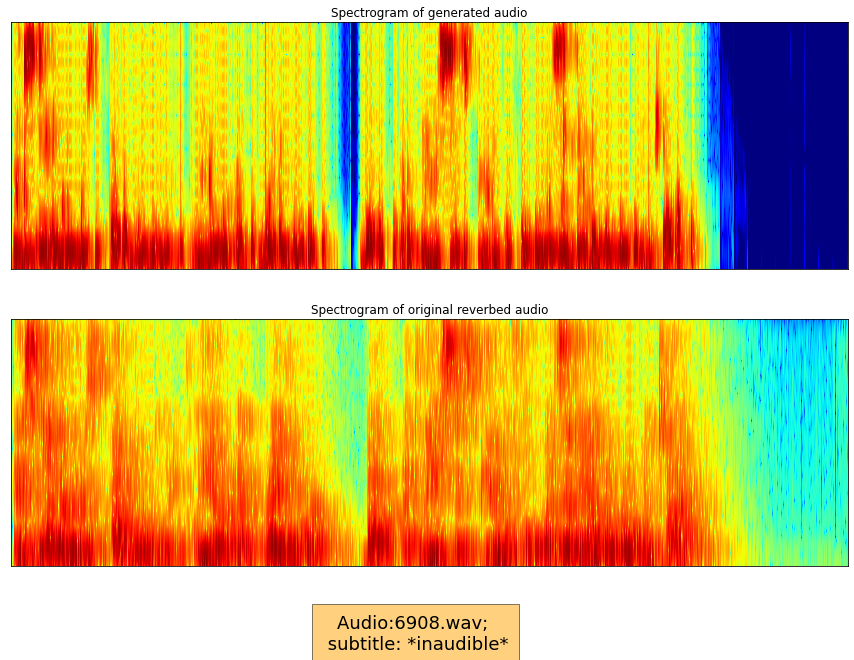

In [322]:
#36k
stft=np.abs(librosa.stft(np.asarray(generatedAudio), **stftParams))
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.title('Spectrogram of generated audio')
librosa.display.specshow(librosa.power_to_db(stft), cmap=cm.jet)
plt.subplot(2, 1, 2)
plt.title('Spectrogram of original reverbed audio')
librosa.display.specshow(librosa.power_to_db(mag), cmap=cm.jet)
# plt.subplot(3, 1, 3)
# plt.text(3, 4, "Audio: LJ001-0048.wav; subtitle: his letter is admirably clear and regular, but at least as beautiful as any other Roman type")
plt.figtext(0.5, 0.01, "Audio:6908.wav; \n subtitle: *inaudible*", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":10})

# Loading model

In [79]:
# checkpoint="/Users/zombie/Downloads/datadrive/17k.pt"
# checkpoint="checkpoints/13kB.pt"
# checkpoint="checkpoints/nn18k3B_final.pt"
checkpoints="../../1MSE12k.pt"
# checkpoint="/Users/zombie/diceBCE11k.pt"
from unet import UNet
net=UNet(1,1)
ckp=torch.load(checkpoint, map_location='cpu')
net.load_state_dict(ckp['modelStateDict'])
net.eval()
print('loaded')

loaded


In [91]:
out=net(torch.from_numpy(magBatch))
generatedAudio=reconstructAudioFromBatches(out.detach().numpy(), phaseBatch, istftParams)

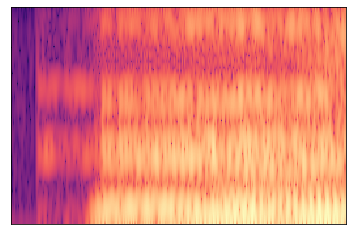

In [57]:
librosa.display.specshow(librosa.power_to_db(magBatch[0][0]))

## 25 March 2021

### New checkpoints training MSE with 1 batchsize

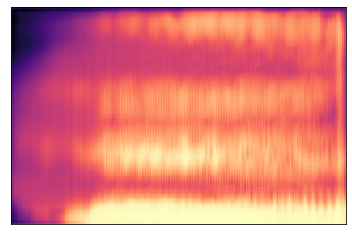

In [81]:
#1MSE12K
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

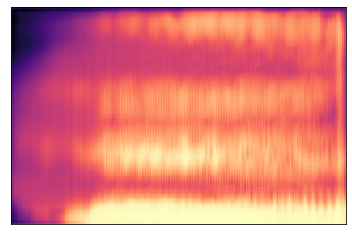

In [58]:
#1MSE8K
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

### 23 March 2021 

### 4B checkpoints tuning 3B

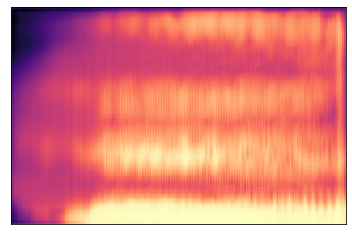

In [46]:
#nn18k3B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

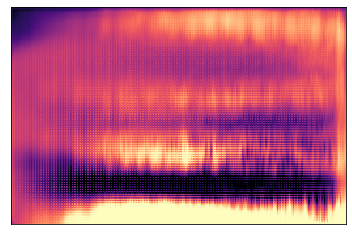

In [375]:
#nn15k3B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

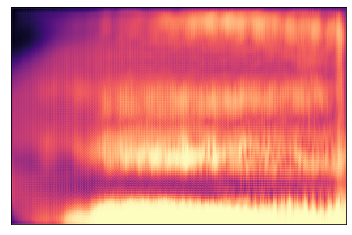

In [319]:
#nn10k3B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

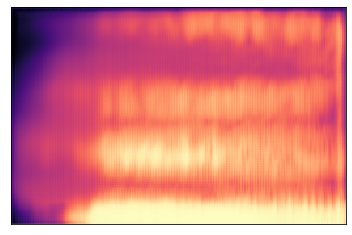

In [284]:
#nn8k3B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

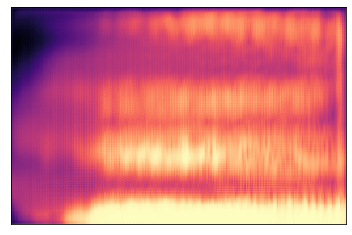

In [236]:
#nn3k3B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

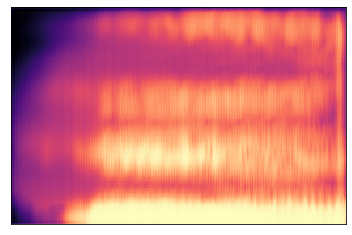

In [229]:
#3k3B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

### 2B checkpoints further tuning with 4B

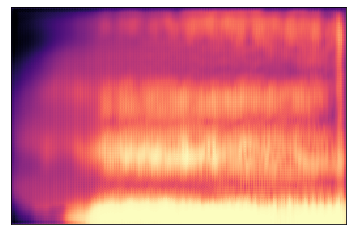

In [222]:
#12k4B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

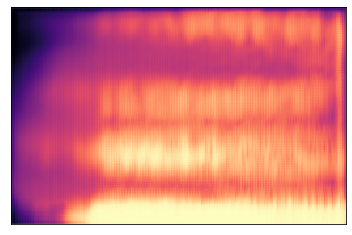

In [218]:
#9k4B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

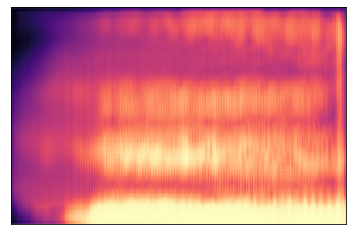

In [160]:
#5k4B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

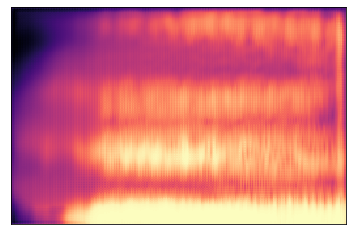

In [141]:
#1k4B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

### 3B checkpoints further tuning with 2B

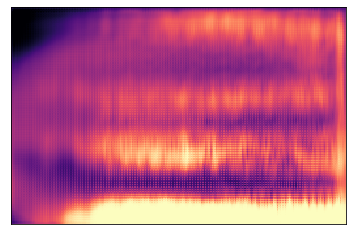

In [134]:
# 11k2B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

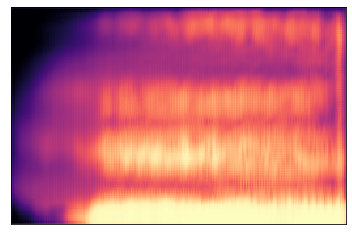

In [113]:
# 3k2B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

### 1B checkpoints further tuning with 3B

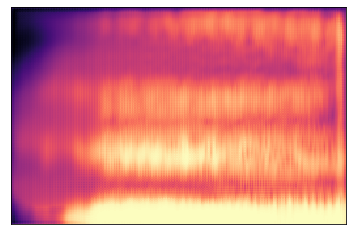

In [103]:
# 6k3B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

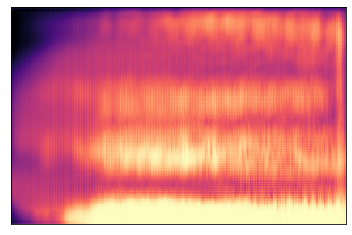

In [40]:
# 5k3B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

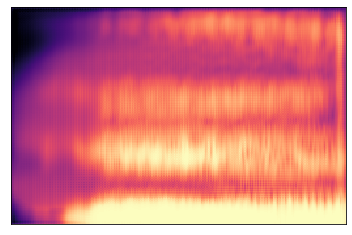

In [35]:
# 1k3B
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

### -- tuning previous checkpoint with batch size 1

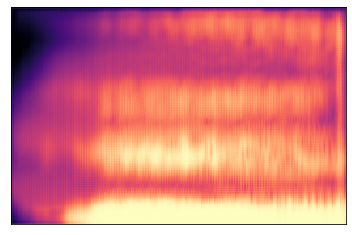

In [26]:
#20k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

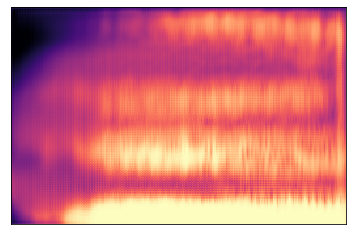

In [21]:
#15k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

## 22 March 2021

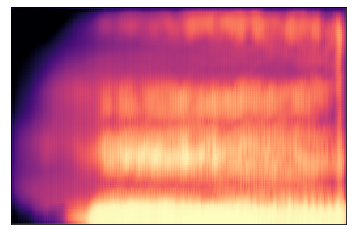

In [29]:
#newExp3_36k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

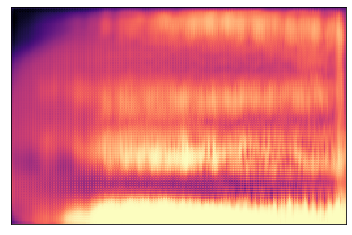

In [764]:
#newExp3_31k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

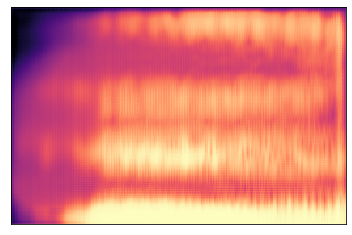

In [656]:
#newExp3_30k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

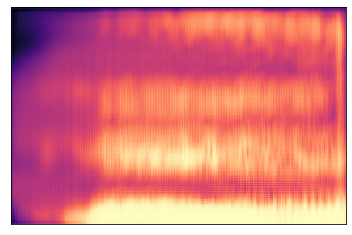

In [507]:
#newExp3_27k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

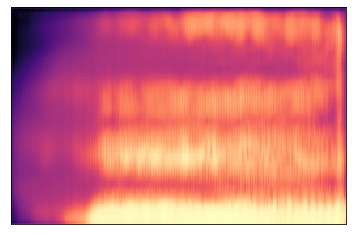

In [499]:
#newExp3_24k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

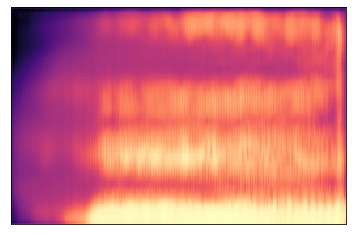

In [500]:
#newExp3_20k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

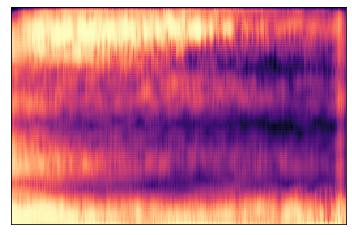

In [421]:
#newExp3_18k.pt
librosa.display.specshow(librosa.power_to_db(out[1][0].detach().numpy()))

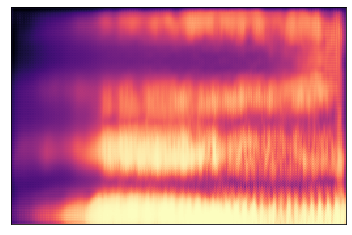

In [336]:
#newExp3_16k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

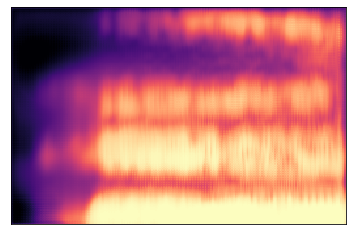

In [299]:
#newExp3_10k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

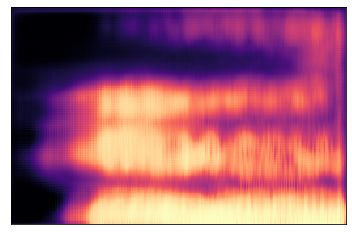

In [244]:
#newExp3_7k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

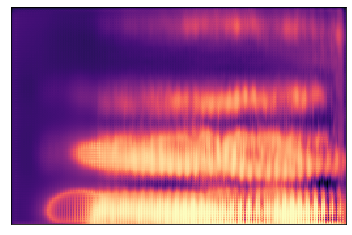

In [223]:
#newExp3_1k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

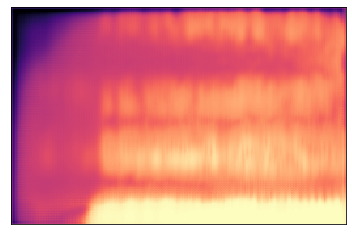

In [218]:
#newExp2_15k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

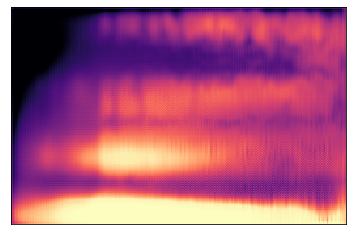

In [213]:
#newExp2_12k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

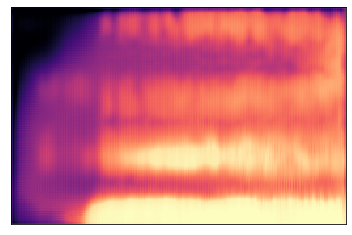

In [70]:
#newExp2_4k.pt
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

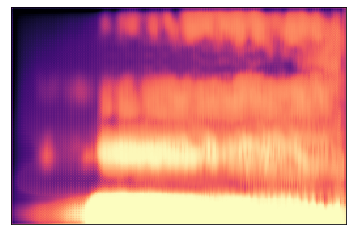

In [62]:
#batch1BCEDICE+23k
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

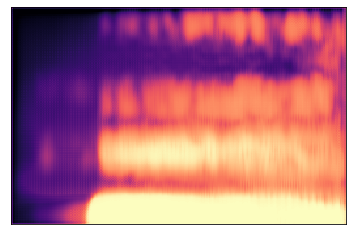

In [24]:
#batch1BCEDICE+17k
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

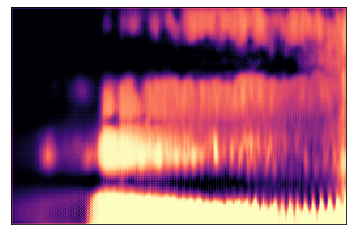

In [20]:
#batch1BCEDICE+6k
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

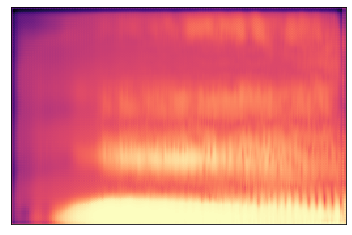

In [19]:
#32kBCEDice
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

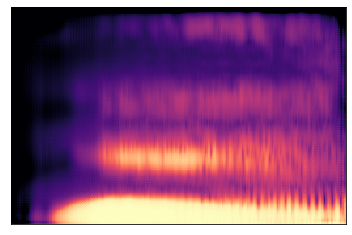

In [17]:
#21kBCEDice
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()**2))

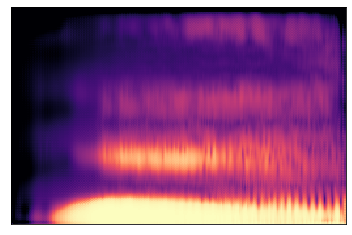

In [21]:
#19kBCEDice
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()**2))

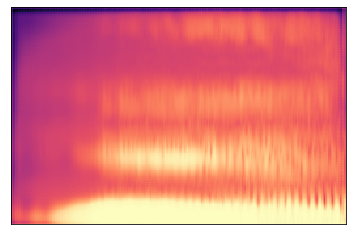

In [19]:
#17.5kBCEDice
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

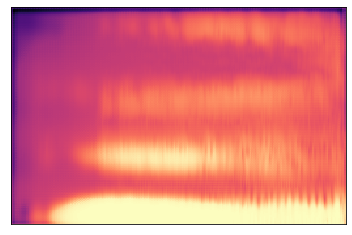

In [33]:
#14kBCEDice
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

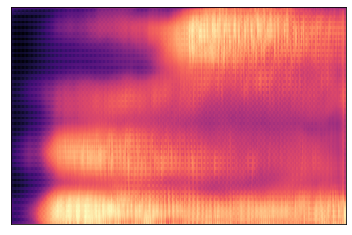

In [82]:
#6kSSIM
librosa.display.specshow(librosa.power_to_db(out[0][0].detach().numpy()))

In [245]:
IPython.display.Audio(np.asarray(generatedAudio), rate=16000)

In [63]:
IPython.display.Audio(np.asarray(generatedAudio), rate=16000)

In [66]:
sf.write('23k.wav', generatedAudio, 16000)

In [20]:
IPython.display.Audio(np.asarray(generatedAudio), rate=16000)

In [32]:
IPython.display.Audio(np.asarray(generatedAudio), rate=16000)

In [21]:
IPython.display.Audio(generatedAudio, rate=16000)

In [34]:
IPython.display.Audio(generatedAudio, rate=16000)

In [83]:
IPython.display.Audio(generatedAudio, rate=16000)

In [20]:
from torchvision.transforms import ToTensor
import PIL.Image

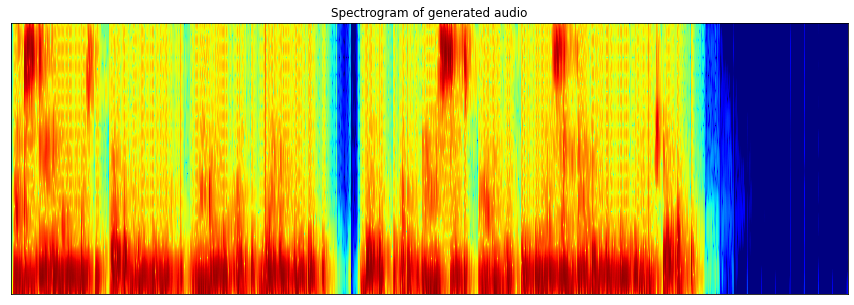

In [52]:
stft=np.abs(librosa.stft(np.asarray(generatedAudio), **stftParams))
plt.figure(figsize=(15, 5))
# plt.subplot(2, 1, 1)
plt.title('Spectrogram of generated audio')
librosa.display.specshow(librosa.power_to_db(stft), cmap=cm.jet)
buf=io.BytesIO()
plt.savefig(buf, format="jpeg")
buf.seek(0)
image = PIL.Image.open(buf)
image = ToTensor()(image)
# plt.subplot(2, 1, 2)
# plt.title('Spectrogram of original reverbed audio')
# librosa.display.specshow(librosa.power_to_db(mag), cmap=cm.jet)

In [53]:
from tensorboardX import SummaryWriter

In [31]:
image=image[0].unsqueeze(0)

In [32]:
image.shape

torch.Size([1, 288, 432])

In [54]:
writer = SummaryWriter(comment='hello imaage')
#x = torchvision.utils.make_grid(image, normalize=True, scale_each=True)
for n_iter in range(100):
    if n_iter % 10 == 0:
        writer.add_image('Image', image, n_iter)